# Khusroo Kalim Ansari : 300347313



# What have influences on your exam scores?

Our analysis for Final term project includes Kaggle student performance dataset. The data comprises college students from the United States' grades. We want to know which gender, on average, excels in math, reading, and writing, taking into account a variety of factors like parental education, lunch, and ethnicity.

# Goal of the analysis

Predicting one's academic progress based on the various environment and factors is the goal of our analysis

`We are taking gender as our target variable(y) and other features as responses(X).`

# Dataset Information-
There are 8 features in our dataset.
1. Gender - Male/Female
2. Ethinicity - Race categorised as group A, B , C, D and E 
3. Parental Education - Educational level of parents
4. Lunch - Type of lunch students took before exam
5. Test prepartion course - practice test taken before exam
6. Score in math
7. Score in reading
8. Score in writing 

# Imporing libraries and raw dataset

In [1]:
import numpy as np   # importing data and libraries
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
from mpl_toolkits import mplot3d
%matplotlib inline
!pip install plotly
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")
df=pd.read_csv('StudentsPerformance.csv')
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

# 1. Data Preparation

We will use some data wrangling techniques in this step to carry out feature engineering. The dataset is initially described below so that you may grasp its mean, variance, quartile, and min and max deviations. However, only three features have the data summary displayed because the data in these characteristics is presented continuously.

In [2]:
df.describe()    # describe the dataset statistics

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [3]:
df.info()   # here we are checking the dataypes of dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Below, we will find if dataset contains any nullm values. Results shows false which means there is no any null value.

In [4]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


Now, we are working on finding duplicacy in the dataset and drop the duplicate records.

In [5]:
df = df.drop_duplicates()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


`As we can see there are categorical data entry, We will handle these entries by converting them to dummies by the following lines of code`

In [6]:
df = pd.get_dummies(df)    #converting categorical data into numerical data
df

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


`It can be seen that columns gender_female and gender_male both has binary values and mutually dependent on each other. we can use any one column in the dataset. Thus we are use gender_male by replacing it with Gender and droping another gender_female column.`

So, If the gender is male the value will be 1 or 0 if it is female

In [7]:
df.drop(['gender_female'], axis=1 ,inplace=True) 
df.rename(columns={'gender_male' : 'gender'}, inplace=True)
df

,math score,reading score,writing score,gender,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


Here, we are handling inappropriate naming conventions for columns.

In [8]:
df.rename(columns={'lunch_free/reduced' : 'lunch_reduced'}, inplace=True)
df.rename(columns={"parental level of education_associate's degree" : 'parental_education_associate'}, inplace=True)
df.rename(columns={"parental level of education_bachelor's degree" : 'parental_education_bachelor'}, inplace=True)
df.rename(columns={"parental level of education_high school" : 'parental_education_high_school'}, inplace=True)
df.rename(columns={"parental level of education_master's degree" : 'parental_education_masters'}, inplace=True)
df.rename(columns={"parental level of education_some college" : 'parental_education_some_college'}, inplace=True)
df.rename(columns={"parental level of education_some high school" : 'parental_education_some_high_school'}, inplace=True)
df.rename(columns={'race/ethnicity_group A'  : 'ethnicity_group_A'}, inplace=True)
df.rename(columns={'race/ethnicity_group B'  : 'ethnicity_group_B'}, inplace=True)
df.rename(columns={'race/ethnicity_group C'  : 'ethnicity_group_C'}, inplace=True)
df.rename(columns={'race/ethnicity_group D' : 'ethnicity_group_D'}, inplace=True)
df.rename(columns={'race/ethnicity_group E': 'ethnicity_group_E'}, inplace=True)

df.rename(columns={'test preparation course_completed': 'test_preparation_course_completed'}, inplace=True)
df.rename(columns={'test preparation course_none': 'test_preparation_course_none'}, inplace=True)
df.rename(columns={'math score' : 'math_score'}, inplace=True)
df.rename(columns={'reading score' : 'reading_score'}, inplace=True)
df.rename(columns={'writing score' : 'writing_score'}, inplace=True)
df


,math_score,reading_score,writing_score,gender,ethnicity_group_A,ethnicity_group_B,ethnicity_group_C,ethnicity_group_D,ethnicity_group_E,parental_education_associate,parental_education_bachelor,parental_education_high_school,parental_education_masters,parental_education_some_college,parental_education_some_high_school,lunch_reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [9]:
df.to_csv('StudentPerformance_cleaned.csv',index=False) 

In [10]:
df=pd.read_csv('StudentPerformance_cleaned.csv')
df

,math_score,reading_score,writing_score,gender,ethnicity_group_A,ethnicity_group_B,ethnicity_group_C,ethnicity_group_D,ethnicity_group_E,parental_education_associate,parental_education_bachelor,parental_education_high_school,parental_education_masters,parental_education_some_college,parental_education_some_high_school,lunch_reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


# Data visualization of dataset

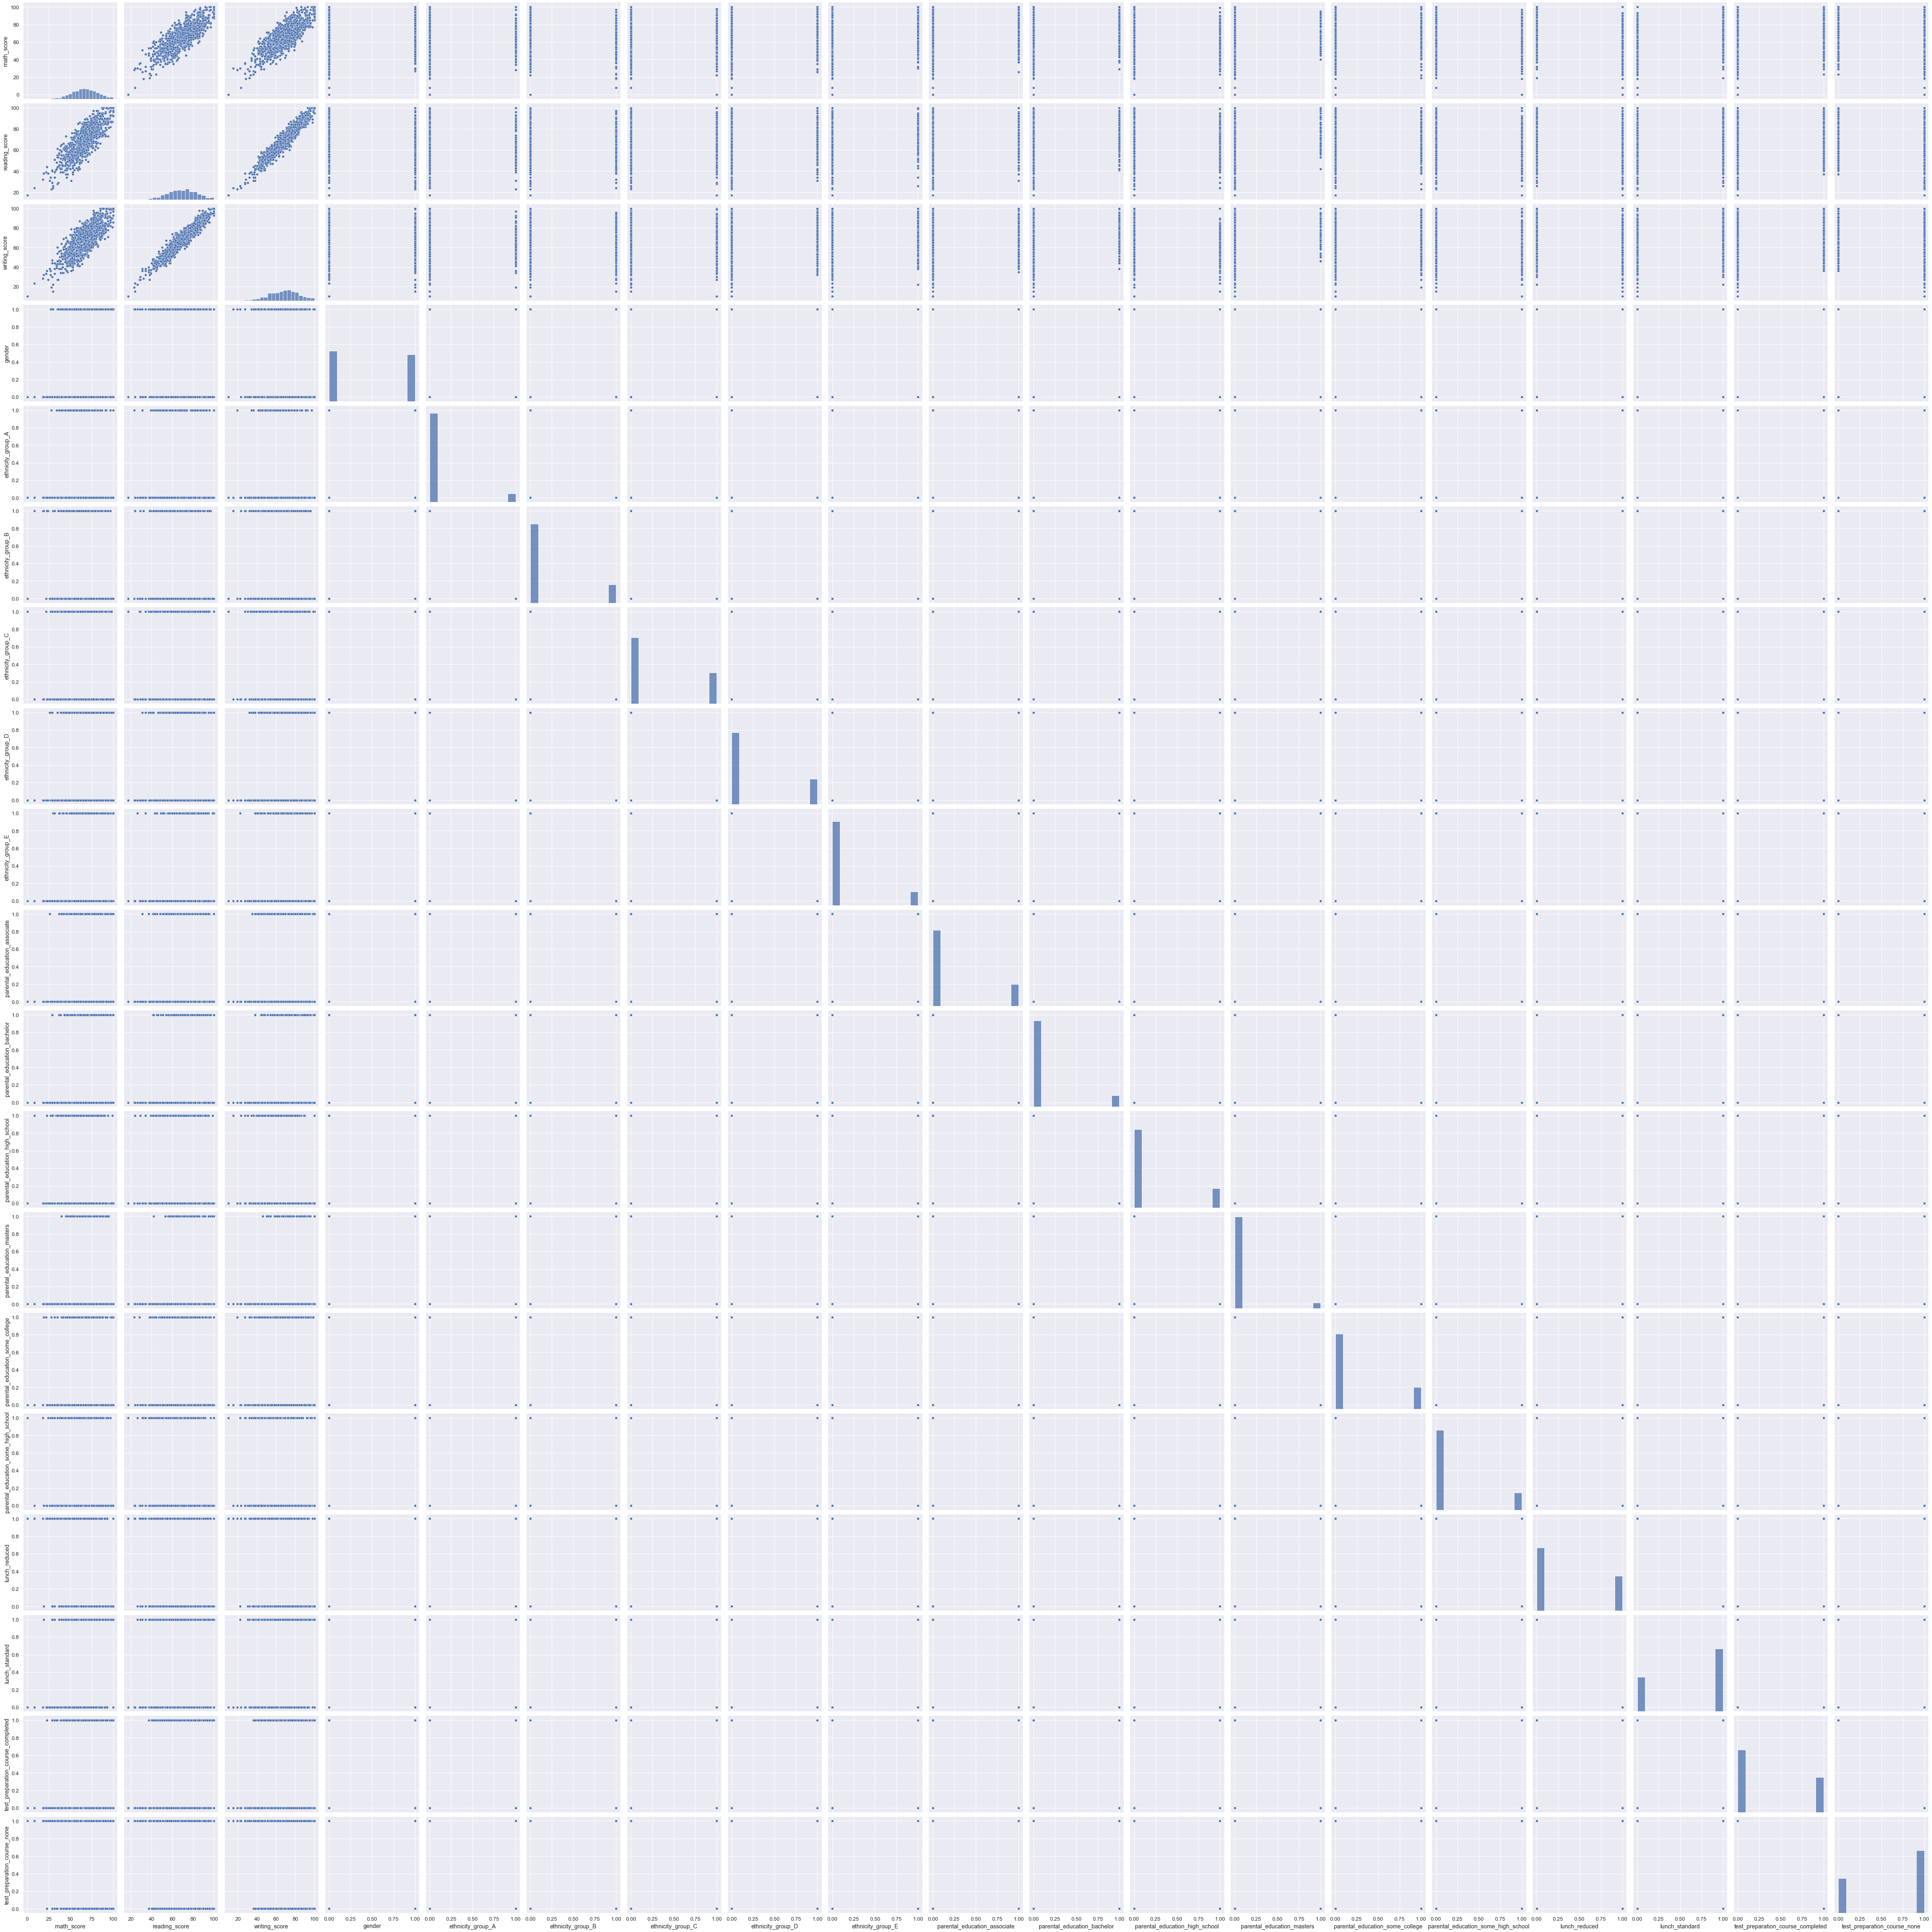

In [47]:
# use inline such that the plot will be sappear and stored within the notebook
import seaborn as sns
%matplotlib inline
sns.pairplot(df, height=3.5)
plt.tight_layout()

# Heatmap visualization

<function matplotlib.pyplot.show(close=None, block=None)>

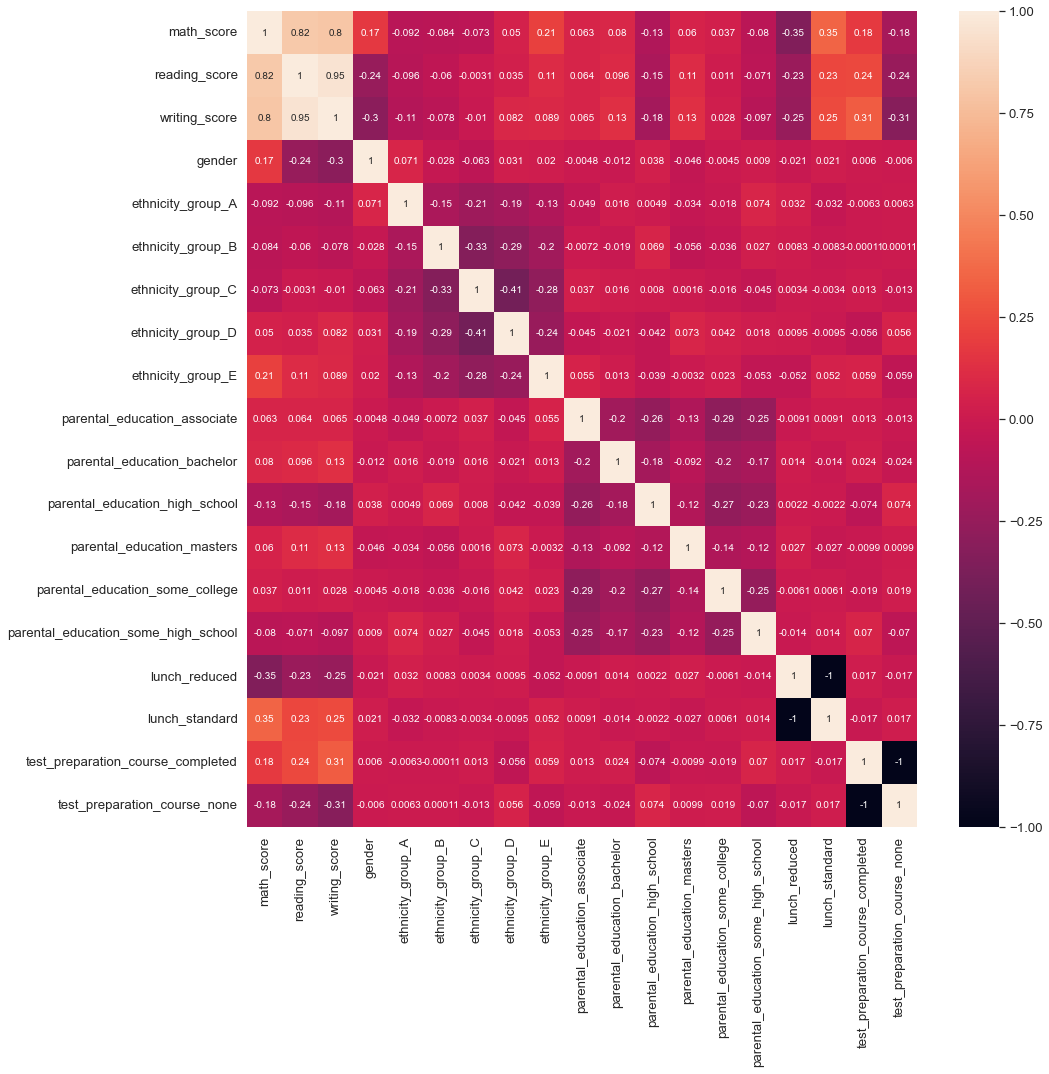

In [52]:
# Calculate and show correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show


[[<AxesSubplot:title={'center':'math_score'}>
  <AxesSubplot:title={'center':'reading_score'}>
  <AxesSubplot:title={'center':'writing_score'}>
  <AxesSubplot:title={'center':'gender'}>]
 [<AxesSubplot:title={'center':'ethnicity_group_A'}>
  <AxesSubplot:title={'center':'ethnicity_group_B'}>
  <AxesSubplot:title={'center':'ethnicity_group_C'}>
  <AxesSubplot:title={'center':'ethnicity_group_D'}>]
 [<AxesSubplot:title={'center':'ethnicity_group_E'}>
  <AxesSubplot:title={'center':'parental_education_associate'}>
  <AxesSubplot:title={'center':'parental_education_bachelor'}>
  <AxesSubplot:title={'center':'parental_education_high_school'}>]
 [<AxesSubplot:title={'center':'parental_education_masters'}>
  <AxesSubplot:title={'center':'parental_education_some_college'}>
  <AxesSubplot:title={'center':'parental_education_some_high_school'}>
  <AxesSubplot:title={'center':'lunch_reduced'}>]
 [<AxesSubplot:title={'center':'lunch_standard'}>
  <AxesSubplot:title={'center':'test_preparation_cour

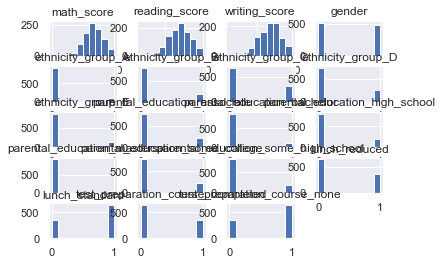

In [13]:
from matplotlib import pyplot

print(df.hist())


The statsticis information of whole dataset is provided below.

In [14]:
df.describe() #summary statistices of cleaned data set

,math_score,reading_score,writing_score,gender,ethnicity_group_A,ethnicity_group_B,ethnicity_group_C,ethnicity_group_D,ethnicity_group_E,parental_education_associate,parental_education_bachelor,parental_education_high_school,parental_education_masters,parental_education_some_college,parental_education_some_high_school,lunch_reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,0.482000,0.089000,0.190000,0.319000,0.262000,0.140000,0.222000,0.11800,0.196000,0.059000,0.226000,0.179000,0.355000,0.645000,0.358000,0.642000
std,15.16308,14.600192,15.195657,0.499926,0.284886,0.392497,0.466322,0.439943,0.347161,0.415799,0.32277,0.397167,0.235743,0.418448,0.383544,0.478753,0.478753,0.479652,0.479652
min,0.00000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.00000,59.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.00000,70.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,77.00000,79.000000,79.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,100.00000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# A. Supervised Learning Method

# Feature Selection

There are number of ways to select features based on different attributes. Firstly, we are trying to use the corelation method to find the best selected feature.

In [15]:
df.corr()   # finding coorelation among dataset features

,math_score,reading_score,writing_score,gender,ethnicity_group_A,ethnicity_group_B,ethnicity_group_C,ethnicity_group_D,ethnicity_group_E,parental_education_associate,parental_education_bachelor,parental_education_high_school,parental_education_masters,parental_education_some_college,parental_education_some_high_school,lunch_reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
math_score,1.000000,0.817580,0.802642,0.167982,-0.091977,-0.084250,-0.073387,0.050071,0.205855,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.350877,0.350877,0.177702,-0.177702
reading_score,0.817580,1.000000,0.954598,-0.244313,-0.096274,-0.060283,-0.003074,0.035177,0.106712,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.229560,0.241780,-0.241780
writing_score,0.802642,0.954598,1.000000,-0.301225,-0.110714,-0.078254,-0.010203,0.082032,0.089077,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.245769,0.312946,-0.312946
gender,0.167982,-0.244313,-0.301225,1.000000,0.071001,-0.028466,-0.063368,0.030566,0.020302,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028
ethnicity_group_A,-0.091977,-0.096274,-0.110714,0.071001,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315
ethnicity_group_B,-0.084250,-0.060283,-0.078254,-0.028466,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106
ethnicity_group_C,-0.073387,-0.003074,-0.010203,-0.063368,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522
ethnicity_group_D,0.050071,0.035177,0.082032,0.030566,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.009458,-0.055956,0.055956
ethnicity_group_E,0.205855,0.106712,0.089077,0.020302,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,0.054922,0.013221,-0.039494,-0.003180,0.023153,-0.053075,-0.052398,0.052398,0.059393,-0.059393
parental_education_associate,0.063228,0.064386,0.064799,-0.004835,-0.048658,-0.007238,0.037077,-0.044674,0.054922,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,-0.009102,0.009102,0.012668,-0.012668


`In above co-relation statistics of dataset, we can see that our target variable gender has low positive relationship with reading_score and writing_score that is 0.2444313 and 0.301225 repectively. Rest of variable has no corelation with target variable that may not provide better predictions. Thus, we have decided that we will not proceed with this method as only two features have low positive corelation with our target variable. So, we are exploring more ways to select features as of below.`

# Feature Plotting

cleaned dataset has 1000 data points with 19 variables each.


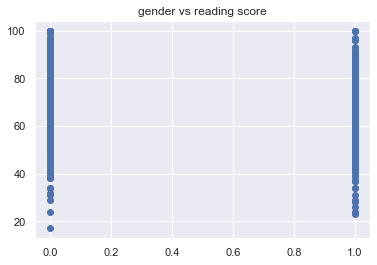

In [16]:
plt.scatter(df.gender, df.reading_score)    #feature plotting of low positive coorelation variables
plt.title("gender vs reading score")
print("cleaned dataset has {} data points with {} variables each.".format(*df.shape) )

cleaned dataset has 1000 data points with 19 variables each.


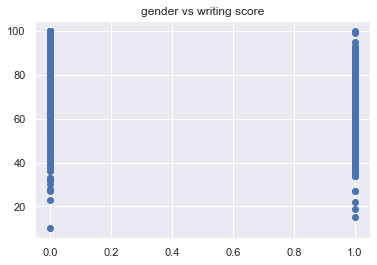

In [17]:
plt.scatter(df.gender, df.writing_score)  #feature plotting of low positive coorelation variables
plt.title("gender vs writing score")
print("cleaned dataset has {} data points with {} variables each.".format(*df.shape) )

cleaned dataset has 1000 data points with 19 variables each.


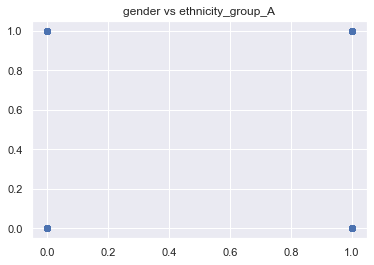

In [18]:
plt.scatter(df.gender, df.ethnicity_group_A)  #feature plotting of no coorelation variables
plt.title("gender vs ethnicity_group_A")
print("cleaned dataset has {} data points with {} variables each.".format(*df.shape) )

Based on corelation, we can consider writing_score and reading_score as our features which influence our target variable. In simple words, we can say that based on all features in the dataset gender gets more influenced by its reading and writing scores. But, this not an apt technique which can provide better prediction. Hence, we will use some feature selection methods to identify features.

# Dividing the dataset into features and response

In [19]:
X = df.drop(['gender'], axis=1)   #Dividing the dataset into features and response. 
y = df['gender']
X.shape

(1000, 18)

# Dividing the dataset into training and testing data samples

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Importing all important libraries to use feature selection methods. Here, we are using six different feature selection methods.

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Feature Selection using Linear SVC

In [22]:
selector = SelectFromModel(estimator=LinearSVC(C=0.001,dual=False)).fit(X, y)
X_sel=selector.transform(X)
X_sel.shape

(1000, 7)

# Feature Selection using Logistic Regression

In [23]:
method2 = SelectFromModel(estimator=LogisticRegression(max_iter=5000)).fit(X, y)
X_method2=method2.transform(X)
X_method2.shape


(1000, 6)

# Feature Selection using Random Forest

In [24]:
RF = SelectFromModel(RandomForestClassifier(n_estimators = 100))
RF.fit(X, y)
X_RF=RF.transform(X)
X_RF.shape

(1000, 3)

# Feature Selection using ADA BOOST

In [25]:
AB=SelectFromModel(AdaBoostClassifier(n_estimators=100, random_state=42,algorithm="SAMME.R", learning_rate=0.1))
AB.fit(X, y)
X_AB=AB.transform(X)
X_AB.shape

(1000, 2)

# Feature Selection using Recursive Feature Elimination and Logistic method

In [26]:

rfe = RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=8, step=1)
rfe_result = rfe.fit(X, y)
print(rfe_result.support_)
print(rfe_result.ranking_)

X_4 = X.loc[:, rfe_result.support_]
X_4.shape

[False False  True False False False  True  True False  True False  True
 False False  True False  True  True]
[ 2 11  1  3  9  8  1  1  7  1  6  1 10  5  1  4  1  1]


(1000, 8)

# Feature Selection using Decision Tree Method

In [27]:
DC = SelectFromModel(DecisionTreeClassifier(max_depth=5))
DC.fit(X, y)
X_DC=DC.transform(X)
X_DC.shape


(1000, 2)

In [28]:
from sklearn.pipeline import Pipeline
names = ["Logistic","Linear SVC","Random forest","AdaBOOST","RFE","Decision Tree"]
predScore=[]
classifiers = [LinearSVC(C=0.001,dual=False),LogisticRegression(max_iter=5000),
               RandomForestClassifier(n_estimators = 100),
               AdaBoostClassifier(n_estimators=100, random_state=42,algorithm="SAMME.R", learning_rate=0.1),
               RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=8, step=1),
               DecisionTreeClassifier(max_depth=5) ]
for classifier in classifiers:
    pipeline = Pipeline(steps=[
                      ('classifier', classifier)])
    pipeline.fit(X_train, y_train)   
    print(classifier)
    predScore.append(pipeline.predict(X_test))
    print("model score: %.6f" % pipeline.score(X_test,y_test))
    print("\n -----------------------------------------------------------------------------------")
  

LinearSVC(C=0.001, dual=False)
model score: 0.910000

 -----------------------------------------------------------------------------------
LogisticRegression(max_iter=5000)
model score: 0.885000

 -----------------------------------------------------------------------------------
RandomForestClassifier()
model score: 0.845000

 -----------------------------------------------------------------------------------
AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
model score: 0.775000

 -----------------------------------------------------------------------------------
RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=8)
model score: 0.580000

 -----------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
model score: 0.840000

 -----------------------------------------------------------------------------------


# saving the selected features into new file named features.csv

In [29]:
selector.get_support(indices=True)

array([ 0,  2,  6,  7, 14, 16, 17], dtype=int64)

In [30]:
df.iloc[:,[0,  2,  6,  7, 14, 16, 17]].to_csv('features.csv',index=False)

In [31]:
df1=pd.read_csv('features.csv')     # reading new dataset 
df1

,math_score,writing_score,ethnicity_group_C,ethnicity_group_D,parental_education_some_high_school,lunch_standard,test_preparation_course_completed
0,72,74,0,0,0,1,0
1,69,88,1,0,0,1,1
2,90,93,0,0,0,1,0
3,47,44,0,0,0,0,0
4,76,75,1,0,0,1,0
...,...,...,...,...,...,...,...
995,88,95,0,0,0,1,1
996,62,55,1,0,0,0,0
997,59,65,1,0,0,0,1
998,68,77,0,1,0,1,1


In [32]:
X1 = df1
y = df['gender']
X1.shape

(1000, 7)

In [33]:
from sklearn.preprocessing import RobustScaler
X_RS=RobustScaler().fit(df1)
X_RS.transform(df1)

array([[ 0.3       ,  0.23529412,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15      ,  0.89411765,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.2       ,  1.12941176,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.35      , -0.18823529,  1.        , ...,  0.        ,
        -1.        ,  1.        ],
       [ 0.1       ,  0.37647059,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.55      ,  0.8       ,  0.        , ...,  0.        ,
        -1.        ,  0.        ]])

In [34]:
X_RS.scale_

array([20.  , 21.25,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ])

In the scaled features, we can see that gender classification whether male or female highly depended on most important features 
those are math_score (20) and writing_score(21.25)while other features put minimal impact on gender category.



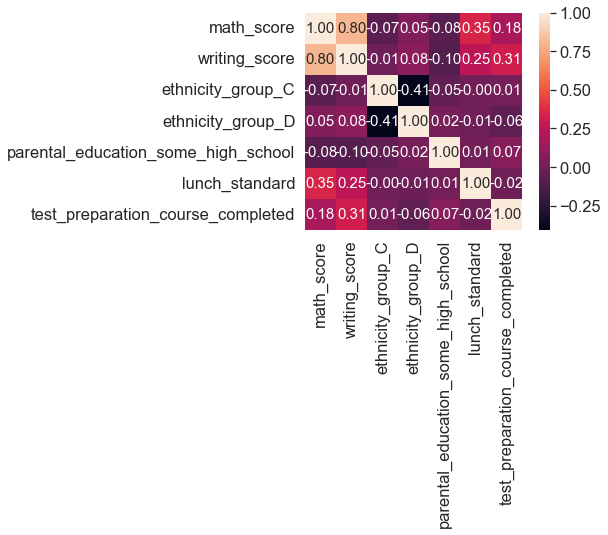

In [35]:
# Calculate and show correlation matrix
cm = np.corrcoef(X1.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=X1.columns,
                xticklabels=X1.columns)

# Feature Scaling

`Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.We expect to see an improved model performance with feature scaling under KNN and SVR and a constant model performance under decision trees with or without feature scaling.`

In [36]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
svr=LinearSVC(C=100,dual=False)
svr_rmse = []

# Without feature scaling
svr.fit(X1_train, y_train)
pred = svr.predict(X1_test)
svr_rmse.append(np.sqrt(mean_squared_error(y_test, pred)))
scalers = [MinMaxScaler(),StandardScaler(),RobustScaler()]
# Apply different scaling techniques and make predictions using SVR
for scaler in scalers:
    pipe = Pipeline(steps=[
                      ('scalers', scaler),("Linear SVC",LinearSVC(C=0.001,dual=False))])
    pipe.fit(X1_train, y_train)
    pred = pipe.predict(X1_test)
    svr_rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

# Show results
svr_df = pd.DataFrame({'RMSE': svr_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
svr_df


,RMSE
Original,0.339116
MinMaxScaler,0.707107
StandardScaler,0.412311
RobustScaler,0.424264


`We can see that in this case, avoiding data scaling will improve the performance of our chosen features. The error rate for the original features subset is modest, at 0.339116, but it rises when alternative scalers are used.`

In [38]:
!pip3 install xgboost 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier



In [40]:
names = ["Naive Bayes","KNN","Decision Tree","Random forest","AdaBOOST","XGBClassifier"]
meanScore2=[]
mse1=[]
classifiers = [ 
    GaussianNB(),
    KNeighborsClassifier(3),  
    DecisionTreeClassifier(max_depth=5,max_leaf_nodes=16), 
    RandomForestClassifier(max_depth=5,n_estimators=100, random_state=42,max_leaf_nodes=16)
    ,AdaBoostClassifier(n_estimators=100, random_state=42,algorithm="SAMME.R", learning_rate=0.1,)
   ,XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')]
for classifier in classifiers:
    pipeline = Pipeline(steps=[
                      ('classifier', classifier)])
    pipeline.fit(X1_train, y_train)   
    print(classifier)
    meanScore2.append(pipeline.score(X1_test, y_test))
    print("model score: %.6f" % pipeline.score(X1_test, y_test))
   
    print("\n -----------------------------------------------------------------------------------")
    

GaussianNB()
model score: 0.705000

 -----------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=3)
model score: 0.895000

 -----------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=16)
model score: 0.845000

 -----------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, max_leaf_nodes=16, random_state=42)
model score: 0.830000

 -----------------------------------------------------------------------------------
AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
model score: 0.780000

 -----------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, impo

In [41]:
 scores_df = pd.DataFrame(zip(names,meanScore2), columns=['Classifiers', 'Accuracy Score']) #printing the values and classifiers into list
print(scores_df)

     Classifiers  Accuracy Score
0    Naive Bayes           0.705
1            KNN           0.895
2  Decision Tree           0.845
3  Random forest           0.830
4       AdaBOOST           0.780
5  XGBClassifier           0.905


`We can notice that the mean accuracy score of XGBClassifier = 0.905 is discovered across all applied classifiers on our chosen feature subset. On the basis of this, we may perform additional computations for the classification report, confusion matrix, and ROC curve.`

# Model Evaluation

#  1.  Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
XB = Pipeline([ (" XGBClassifier Classifier",  XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') )])
XB.fit(X1_train, y_train)   
y_pred = XB.predict(X1_test)
data = confusion_matrix(y_test, y_pred)
data

array([[92,  7],
       [12, 89]], dtype=int64)

The result is telling us that we have 89 + 92 correct predictions and 12 + 7 incorrect predictions.

# 2. Classification Report

### Get the values of precision and recall

- `The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.`

- `The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.`

- `The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.`

- `The support is the number of occurrences of each class in y_test.`

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        99
           1       0.93      0.88      0.90       101

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



we can see from the above analysis that precision is recored higher which means that a classifier can not label all positive samples if there are negative samples exist. In simple words, certain factors can predict more positive impact on gender of students but still tendency of certain factors have no impact on the gender exists.

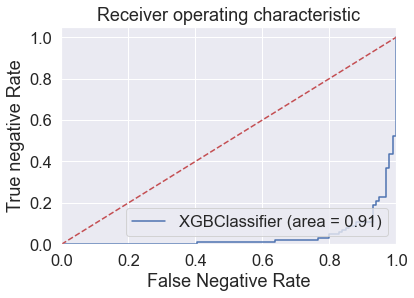

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

XB_roc_auc = roc_auc_score(y_test, XB.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y_test, XB.predict_proba(X1_test)[:,0])
plt.figure()
plt.plot(fpr, tpr, label='XGBClassifier (area = %0.2f)' % XB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Negative Rate')
plt.ylabel('True negative Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Here, we can see that area under curve is more near to 1 which means this classifier shows better classsification of data. Hence , it will give more accurate results of our prediction.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

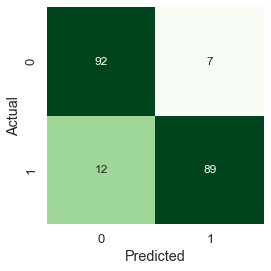

In [45]:
#Generate seaborn heatmap for the confusion matrix
import seaborn as sns
import numpy as np

df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=20, square=True, fmt="d", cmap="Greens")

# Out of sample Prediction


It is common to evaluate the performance of a machine learning algorithm on a dataset using a resampling technique such as k-fold cross-validation.The k-fold cross-validation procedure involves splitting a training dataset into k groups, then using each of the k groups of examples on a test set while the remaining examples are used as a training set. This is called out of sample prediction.

This procedure can be summarized as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups.
3. For each unique group:
- a. Take the group as a holdout or test data set.
- b. Take the remaining groups as a training data set.
- c. Fit a model on the training set and evaluate it on the test set.
- d. Retain the evaluation score and discard the model.
4. Summarize the skill of the model using the sample of model evaluation scores.

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [49]:
from sklearn.model_selection import cross_val_score
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, random_state=42)
kfold = KFold(n_splits=10, shuffle=True)
XB = Pipeline([ ("XGBC classifier", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))])
XB.fit(X1_train, y_train)
scores=cross_val_score(XB, X1, y, cv=kfold)
print("Cross-validation scores:\n{}".format(cross_val_score(XB, X1, y, cv=kfold)))
print("Average cross-validation score: {:.6f}".format(scores.mean()))
pred = XB.predict(X1_test)
acc = accuracy_score(y_test, pred)      
print('Accuracy on testing data is :', acc)   

Cross-validation scores:
[0.86 0.86 0.93 0.91 0.8  0.88 0.86 0.85 0.84 0.86]
Average cross-validation score: 0.865000
Accuracy on testing data is : 0.868


`Using Out of sample analysis, we can see that out of sample prediction provides 0.868 accuracy.` 

# Result Analysis

- After carfully performing the steps of feature selection, scaling, transforming and modelling using supervised machine learning algorithms, we have deduced that our dataset produces 90.5% accuracy without feature scaling and following supervised learning methods so far as compared to other computations we did on our dataset.`

- Also, we can see that gender classification whether male or female highly depended on most important features those are math_score (20) and writing_score(21.25)while other features put minimal impact on gender category as per our scaled data subset and feature selection. This selection has given us accuracy of 0.905

- In our analysis we can aslo conclude that if the gender is male there's a high chance they perform better in Maths and if the gender is female they have a higher chance to perform better in Writing. 

`Note: This analysis is not to build a perception or assumption about any perticular gender it is to just show how machine learning can be used to analyse datasets and datasets can be of a certain sample size which do not include all the population and scenarios`